<a href="https://colab.research.google.com/github/Gabonoid/Kmedias/blob/main/Examen_primer_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.groupby("Survived").size()

Survived
0    549
1    342
dtype: int64

In [ ]:
dfClean = df[["Age", "Survived", "Sex"]].dropna().replace({"male": 0, "female":1})
dfClean.to_csv(r"dfClean.csv")

In [ ]:
dfClean

,Age,Survived,Sex
0,22.0,0,0
1,38.0,1,1
2,26.0,1,1
3,35.0,1,1
4,35.0,0,0
...,...,...,...
885,39.0,0,1
886,27.0,0,0
887,19.0,1,1
889,26.0,1,0


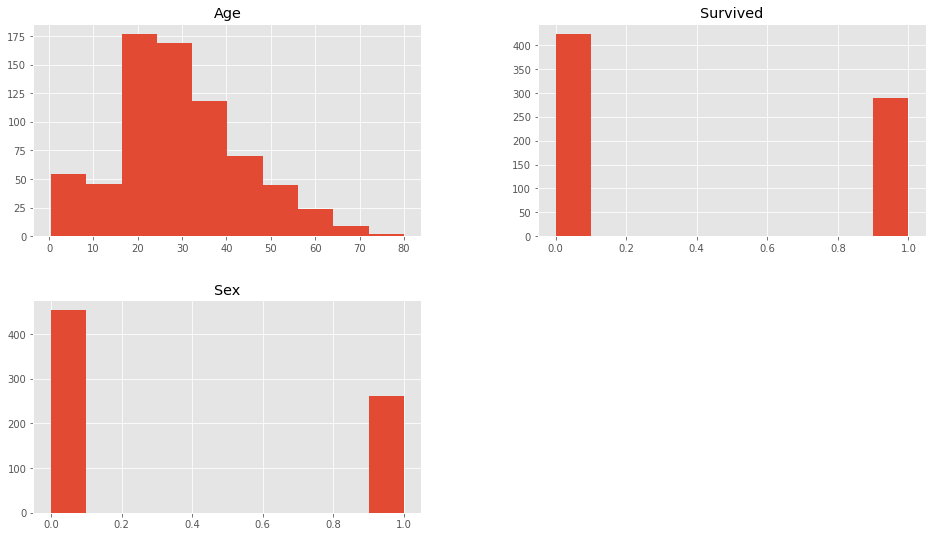

In [ ]:
dfClean.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


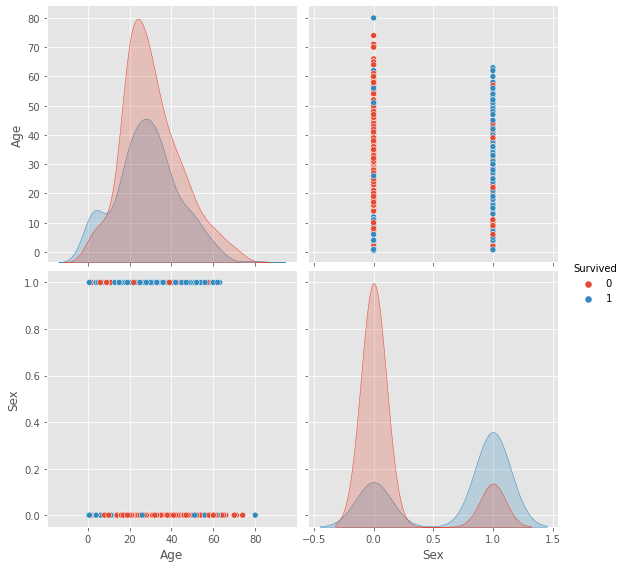

In [ ]:
sb.pairplot(dfClean, hue="Survived" ,size= 4 ,vars=["Age", "Sex"],kind='scatter')

In [ ]:
X = np.array(dfClean[["Sex","Age"]])
Y = np.array(dfClean['Survived'])

X.shape

(714, 2)

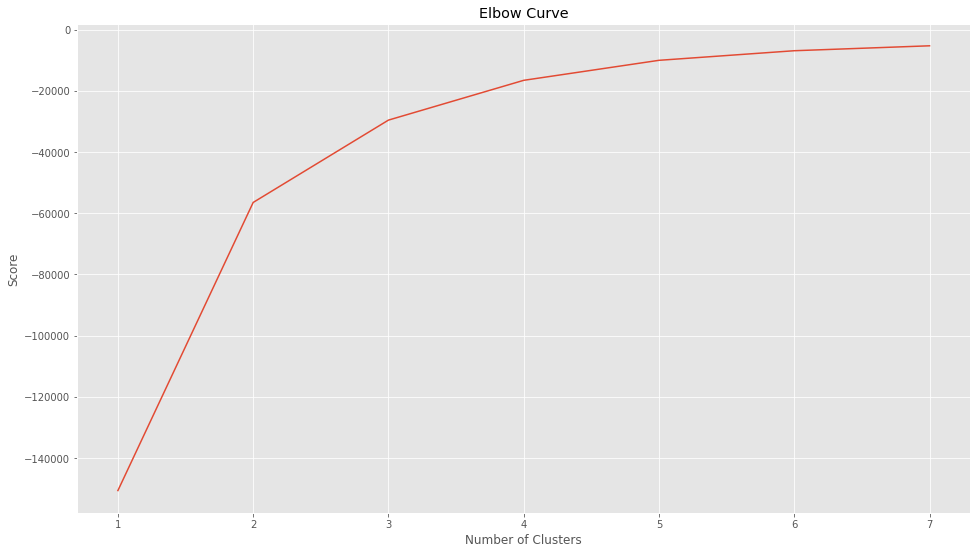

In [ ]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_

print(centroids)

[[ 0.37946429 20.85082589]
 [ 0.34210526 44.60150376]]


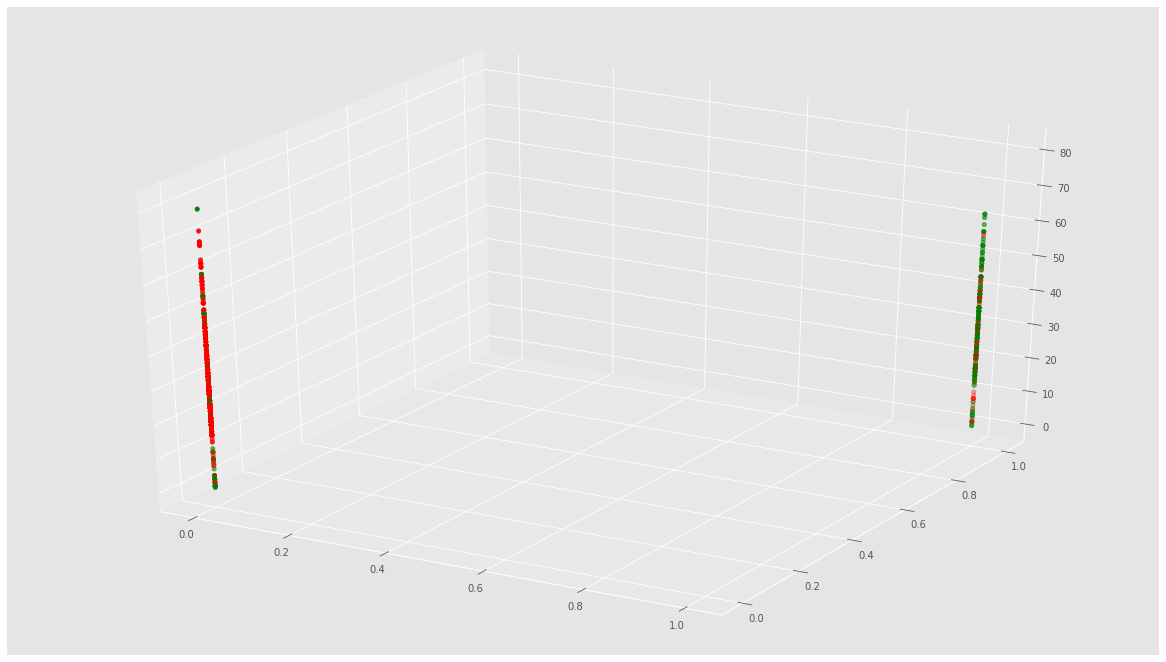

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['red','green']
asignar=[]
for row in Y:
    asignar.append(colores[row])
  
ax.scatter(X[:, 0], X[:, 0], X[:, 1], c=asignar,s=20)

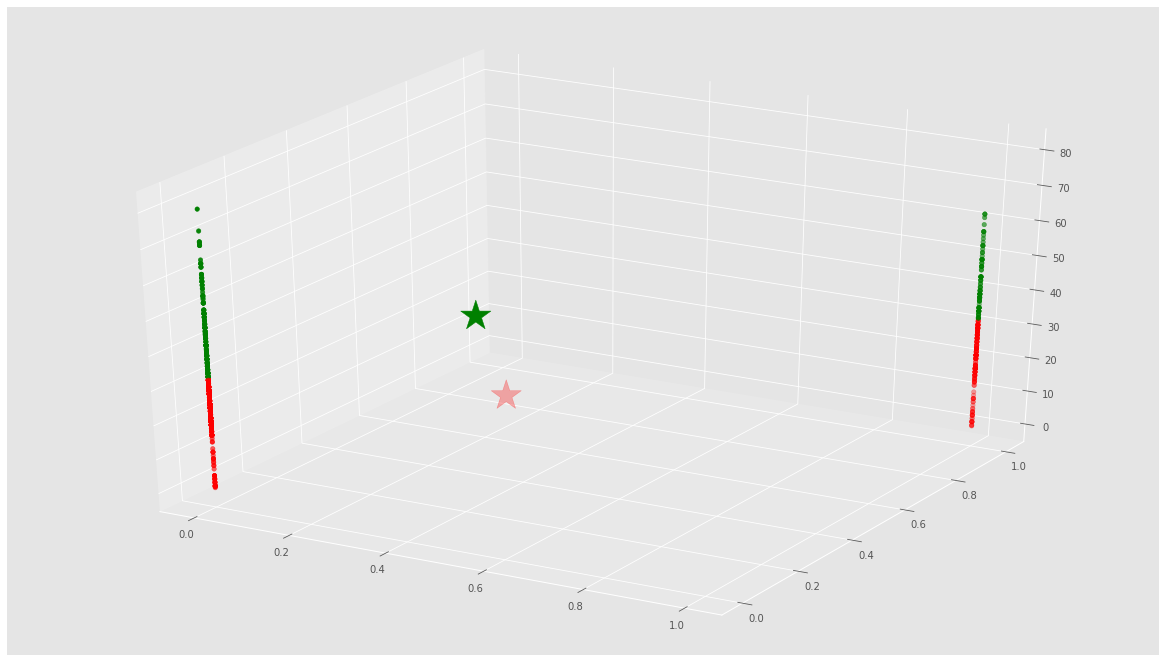

In [ ]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

colores=['red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 0], X[:, 1], c=asignar,s=20)
ax.scatter(C[:, 0], C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

In [ ]:
aciertos = 0
errores = 0

for num in range(len(labels)):
  if (labels[num] == Y[num]):
    aciertos = aciertos + 1
  else:
    errores = errores + 1

print(f'Aciertos: {aciertos} = {(aciertos * 100)/714}%')
print(f'Errores: {errores} = {(errores * 100)/714}%')


Aciertos: 370 = 51.82072829131653%
Errores: 344 = 48.17927170868347%
